# Exploring Wikipedia in a Temporal Fashion
Authors: Felix Borum Burmester & Christian Vestergaard Djurhuus.

In this notebook, we will explore the temporal development of Marvel- and DC-Comics. We have used the Wikipedia Revisions api to scrape the Wikipedia pages of 2303 superheroes since the dawn of Wikipedia. We have used these pages to create a directed, temporal graph object that will allow us to understand the development of revisions.

We have also webscraped meta data from lists of female, black, latino, and asian superheroes and villains. With this meta data we were able to appoint node attributes to our graph with the help of document similarity (since different websites may call superheroes by different versions of their names).

Let's explore the data and its attributes!

## Exploration of Basic Stats in Network
### Node Analysis
Let's view the number of nodes with each label by time:

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

meta_df = pd.read_csv('metadataproject.csv')
edgelist = pd.read_csv('corrected_edgelist.csv')

In [2]:
meta_df.head()

Unnamed: 0  CharacterName                 WikiLink universe  asian  latino  \
0           0    Abomination  Abomination (character)   Marvel      0       0   
1           1  Absorbing Man            Absorbing Man   Marvel      0       0   
2           2         Achebe          Achebe (comics)   Marvel      0       0   
3           3          Agent           Agent (comics)   Marvel      0       0   
4           4        Agent X  Agent X (Marvel Comics)   Marvel      0       0   

   woman  black  man  good  bad  
0      0      0    1     0    1  
1      0      0    1     0    1  
2      0      0    0     0    0  
3      0      0    1     1    0  
4      0      0    1     1    0

As you can see, there is not meta data for all nodes; Achebe has no gender, race or alignment in our data.

In [3]:
edgelist.head()

source                target  timestamp
0  Abomination (character)         Silver Surfer       2014
1  Abomination (character)  Thor (Marvel Comics)       2014
2  Abomination (character)     Sprocket (comics)       2014
3  Abomination (character)          Glenn Talbot       2014
4  Abomination (character)                 MODOK       2014

Now we create a node list and merge it with our meta data

In [4]:
sourcenodes = pd.DataFrame(np.array(list(edgelist.groupby(['source','timestamp']).groups.keys())), columns = ['node','timestamp'])
targetnodes = pd.DataFrame(np.array(list(edgelist.groupby(['target','timestamp']).groups.keys())), columns = ['node','timestamp'])
#keep unique nodes and timestamps!
nodes =  pd.concat([sourcenodes,targetnodes]).drop_duplicates().reset_index(drop=True)

In [5]:
temp = meta_df.rename(columns={'WikiLink':'node'})
nodes = pd.merge(nodes, temp, on="node")
nodes = nodes.drop(columns=['Unnamed: 0'])
nodes

node timestamp CharacterName universe  asian  latino  woman  \
0             3-D Man      2007       3-D Man   Marvel      0       0      0   
1             3-D Man      2008       3-D Man   Marvel      0       0      0   
2             3-D Man      2009       3-D Man   Marvel      0       0      0   
3             3-D Man      2010       3-D Man   Marvel      0       0      0   
4             3-D Man      2011       3-D Man   Marvel      0       0      0   
...               ...       ...           ...      ...    ...     ...    ...   
34758  Zorro (comics)      2018         Zorro   Marvel      0       1      0   
34759  Zorro (comics)      2019         Zorro   Marvel      0       1      0   
34760  Zorro (comics)      2020         Zorro   Marvel      0       1      0   
34761  Zorro (comics)      2021         Zorro   Marvel      0       1      0   
34762  Zorro (comics)      2022         Zorro   Marvel      0       1      0   

       black  man  good  bad  
0          0    1     1    0  
1          0    1     1    0  
2          0    1     1    0  
3          0    1     1    0  
4          0    1     1    0  
...      ...  ...   ...  ...  
34758      0    0     1    0  
34759      0    0     1    0  
34760      0    0     1    0  
34761      0    0     1    0  
34762      0    0     1    0  

[34763 rows x 11 columns]

We need some pd.series to plot, so we use groupby and its features to get them and create three plots:

In [6]:
#get plotable data for marvel and dc
total_nodes_by_year = nodes.groupby('timestamp').size()
temp = nodes.groupby(['universe'])
dc_nodes_by_year, marvel_nodes_by_year = [temp.get_group(x) for x in temp.groups]
dc_nodes_by_year = dc_nodes_by_year.groupby('timestamp').size()
marvel_nodes_by_year = marvel_nodes_by_year.groupby('timestamp').size()

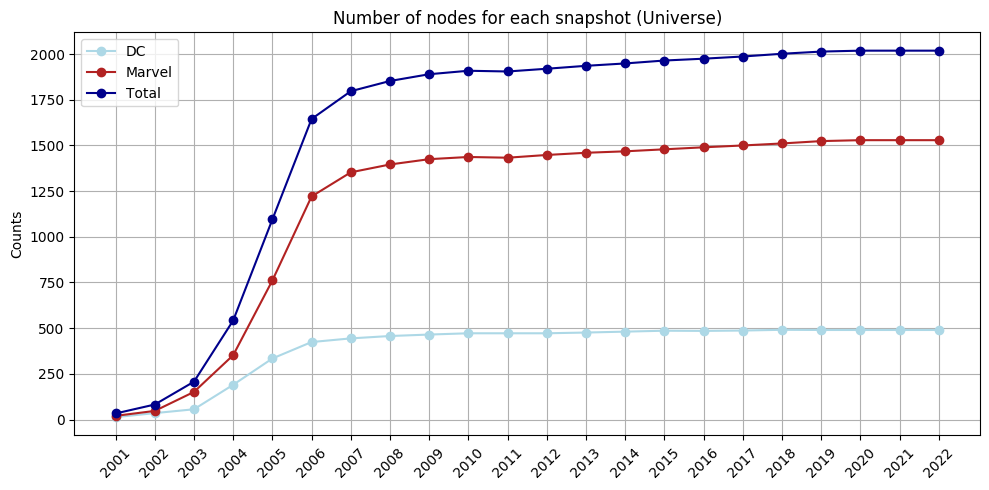

In [7]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(dc_nodes_by_year.index, dc_nodes_by_year.values, '-o', c='lightblue', label='DC')
ax.plot(marvel_nodes_by_year.index, marvel_nodes_by_year.values, '-o', c='firebrick', label='Marvel')
ax.plot(total_nodes_by_year.index, total_nodes_by_year.values, '-o', c='darkblue',label='Total')
ax.set_title("Number of nodes for each snapshot (Universe)")
ax.set_ylabel("Counts")
ax.grid()
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
#get plotable data for sex, race and alignment!
temp = nodes.groupby(['man'])
man_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()
temp = nodes.groupby(['woman'])
woman_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()
temp = nodes.groupby(['asian'])
asian_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()
temp = nodes.groupby(['latino'])
latino_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()
temp = nodes.groupby(['black'])
black_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()
temp = nodes.groupby(['good'])
good_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()
temp = nodes.groupby(['bad'])
bad_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()

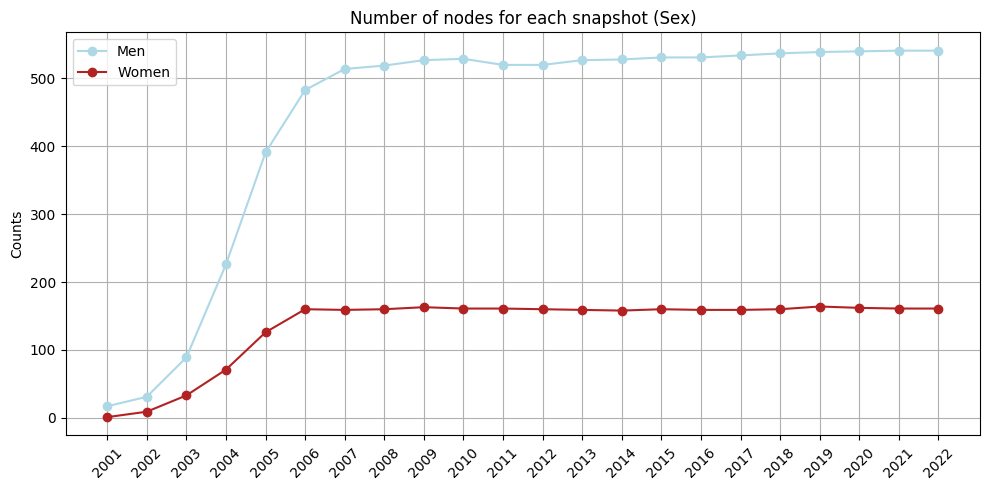

In [9]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(man_nodes_by_year.index, man_nodes_by_year.values, '-o', c='lightblue', label='Men')
ax.plot(woman_nodes_by_year.index, woman_nodes_by_year.values, '-o', c='firebrick', label='Women')
ax.set_title("Number of nodes for each snapshot (Sex)")
ax.set_ylabel("Counts")
ax.grid()
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

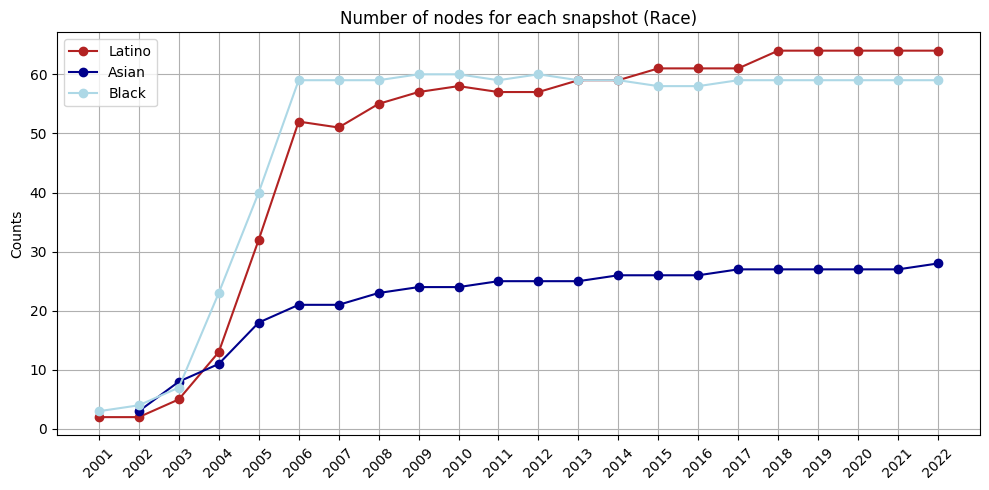

In [10]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(latino_nodes_by_year.index, latino_nodes_by_year.values, '-o', c='firebrick', label='Latino')
ax.plot(asian_nodes_by_year.index, asian_nodes_by_year.values, '-o', c='darkblue',label='Asian')
ax.plot(black_nodes_by_year.index, black_nodes_by_year.values, '-o', c='lightblue',label='Black')
ax.set_title("Number of nodes for each snapshot (Race)")
ax.set_ylabel("Counts")
ax.grid()
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

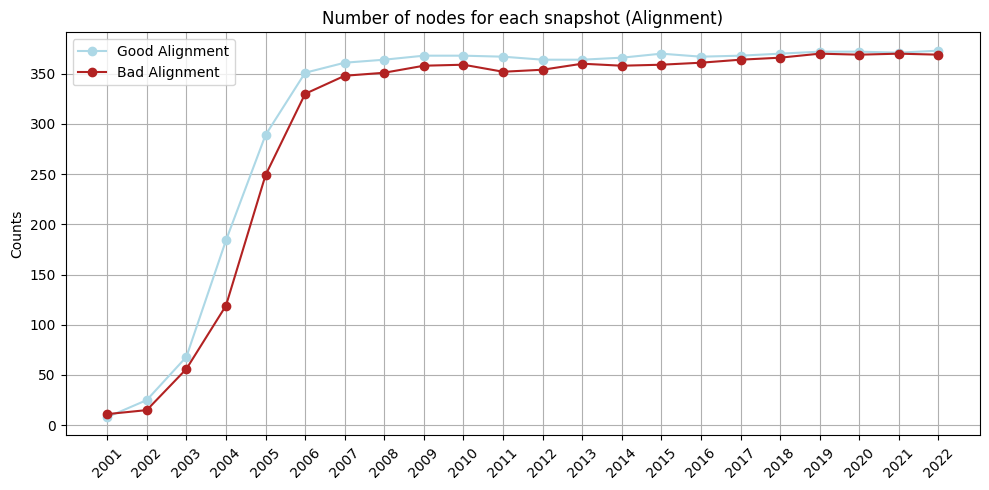

In [11]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(good_nodes_by_year.index, good_nodes_by_year.values, '-o', c='lightblue', label='Good Alignment')
ax.plot(bad_nodes_by_year.index, bad_nodes_by_year.values, '-o', c='firebrick',label='Bad Alignment')
ax.set_title("Number of nodes for each snapshot (Alignment)")
ax.set_ylabel("Counts")
ax.grid()
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It was not possible to find any list of caucasian superheroes or villains. You might be able to conclude that the rest are white, but as some superheroes or villains are aliens, it would not be correct to assume them to be white. "Why not find a list of extraterestial superheroes?" Well, Thor, Loki and Odin are extraterestial but they are also caucasian. We found it best not to mess with this as the data would be highly inaccurate.

All plots of nodes seem to follow the general Wikipedia trend ([with the massive surge in 2004-2006](https://en.wikipedia.org/wiki/Wikipedia:Statistics)). It is still interesting that there have been a lot more pages created on male superheroes as compared to female superheroes. This could indicate that there are more male superheroes to create articles about and that the ones creating articles are more interested in them (perhaps because they are males themselves).

It's also interesting to see that latino superheroes seem to overtake the number of black superheroes in 2015.

### Node Degree Analysis
Now we'll explore the degrees as a function of time. As we know, the graph is directed and will therefore have an in- and out-degree for each node. First, we'll see the average in- and out-degree of the graphs in each snapshot as a function of time.

In [12]:
#create edgelist for each year
import networkx as nx
import numpy as np
edgelist_divided = {}
groups = edgelist.groupby('timestamp').groups
for key, index in groups.items():
    edgelist_divided[key] = edgelist.loc[index]

In [325]:
#create graphs for each year
from tqdm import tqdm
graphs = {}
avg_degrees = {}
for key, edges in tqdm(edgelist_divided.items()):
    universe = {}
    sex = {}
    race = {}
    alignment = {}
    DG = nx.DiGraph()
    nodes_G = np.array(list((edges['source']).unique())+list((edges['target']).unique()))
    DG.add_nodes_from(nodes_G)
    for node in nodes_G:
        try:
            universe[node] = list(nodes[nodes['node']==node]['universe'])[0]
        except IndexError:
            DG.remove_node(node)
            continue
        if list(nodes[nodes['node']==node]['man'])[0] == 1:
            sex[node] = 'Male'
        if list(nodes[nodes['node']==node]['woman'])[0] == 1:
            sex[node] = 'Female'
        if list(nodes[nodes['node']==node]['black'])[0] == 1:
            race[node] = 'Black'
        if list(nodes[nodes['node']==node]['latino'])[0] == 1:
            race[node] = 'Latino'
        if list(nodes[nodes['node']==node]['asian'])[0] == 1:
            race[node] = 'Asian'
        if list(nodes[nodes['node']==node]['good'])[0] == 1:
            alignment[node] = 'Good'
        if list(nodes[nodes['node']==node]['bad'])[0] == 1:
            alignment[node] = 'Bad'
        try:
            sex[node]
        except KeyError:
            sex[node] = 'Undefined'
        try:
            race[node]
        except KeyError:
            race[node] = 'Undefined'
        try:
            universe[node]
        except KeyError:
            universe[node] = 'Undefined'
        try:
            alignment[node]
        except KeyError:
            alignment[node] = 'Undefined'
    nx.set_node_attributes(DG,universe,'Universe')    
    nx.set_node_attributes(DG,sex,'Sex')
    nx.set_node_attributes(DG,race,'Race')
    nx.set_node_attributes(DG,alignment,'Alignment')
    DG.add_edges_from(np.array(edges[['source','target']]))
    graphs[key] = DG.copy()
    avg_degrees[key] = sum([DG.in_degree(x) for x in DG.nodes()])/DG.number_of_nodes()
    DG = DG.clear()

100%|██████████| 22/22 [12:18<00:00, 33.57s/it]


In [14]:
list(nx.get_node_attributes(graphs[2022],'Alignment').items())[:5]

[('Abomination (character)', 'Bad'),
 ('Absorbing Man', 'Bad'),
 ('Agent (comics)', 'Good'),
 ('Agent X (Marvel Comics)', 'Good'),
 ('Air-Walker', 'Bad')]

In [328]:
for key in graphs.keys():
    nx.write_gml(graphs[key],f'graphs/DG_{key}')

In [385]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import tqdm as tqdm
graphs = {}
for key in np.arange(2001,2023,1):
    graphs[key] = nx.read_gml(f'graphs/DG_{key}')

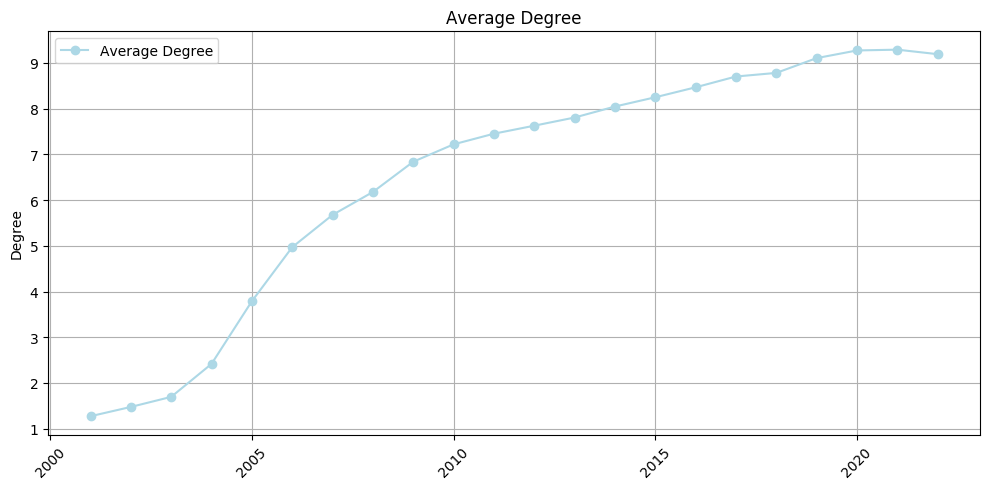

In [17]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(list(avg_degrees.keys()), list(avg_degrees.values()), '-o', c='lightblue', label='Average Degree')
ax.set_title("Average Degree")
ax.set_ylabel("Degree")
ax.grid()
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average in and out degree are the same at each timestep as a link requires a source (out) and a target (in) to be there. I forgot that and stressed that I could only see out degree on the plot xD

It seems degrees grow in the same relative manner as the number of nodes and number of edges which is quite obvious but nice to know for a fact.

### Do the Graphs Differ from Random Graphs?
To answer this, we will perform some permutation tests.

> * First, we will shift the links between nodes and measure average node centrality.
> * Second, we will shift the labels of the nodes and again measure average node centrality between groups (Sex, Universe, Race and Alignment)
> * Finally, if we do see some difference between these graphs and random graphs, we might do some sentiment analysis on the nodes that we do have alignment for!

As discussed earlier, we subset the data from 2007 and onwards because of the explosion of revisions before that overshadowing everything else we might see.

In [18]:
graphs_07 = dict(list(graphs.items())[6:])

In [19]:
import random
# Define our double edge swap algorithm (taken from a previous course)
def double_edge_swap(G: nx.DiGraph, N: int)->nx.DiGraph:
    '''
    First we choose random nodes. After that we choose to search edges through the neighbors as we assume
    that the number of neighbors is much smaller than the entire edge list, especially for large
    scale networks. This is the way!
    '''
    G_random = G.copy()
    num_swaps = 0
    edges = list(G_random.edges) #Define edges out of the loop. No need to update them!
    while num_swaps < N:
        (u,_), (x,_) = random.choices(edges, k=2) #Draw source nodes
        
        if u==x: #Same source 
            continue
        
        u_neighbors = list(G_random.neighbors(u))
        x_neighbors = list(G_random.neighbors(x))
        
        v = random.choices(u_neighbors)[0] #Draw target nodes
        y = random.choices(x_neighbors)[0]
        
        if v==y: #Same target
            continue

        if (x not in G_random.neighbors(u)) and (y not in G_random.neighbors(v)):
            G_random.add_edge(u, x) 
            G_random.add_edge(v, y)
            G_random.remove_edge(u, v) 
            G_random.remove_edge(x, y)
            num_swaps += 1
    return G_random 

In [20]:
dist_to_quantiles = []
for key,value in tqdm(graphs_07.items()):
    node_cen = []
    true_node_cen = np.mean(list(dict(nx.degree_centrality(value)).values()))
    for i in range(50):
        G_random = double_edge_swap(value.to_undirected(),nx.number_of_edges(value)+1000)
        node_cen.append(np.mean(list(dict(nx.degree_centrality(G_random)).values())))
    node_cen_quantiles = np.percentile(node_cen,95)
    dist_to_quantiles.append(true_node_cen-node_cen_quantiles)

100%|██████████| 16/16 [03:34<00:00, 13.42s/it]


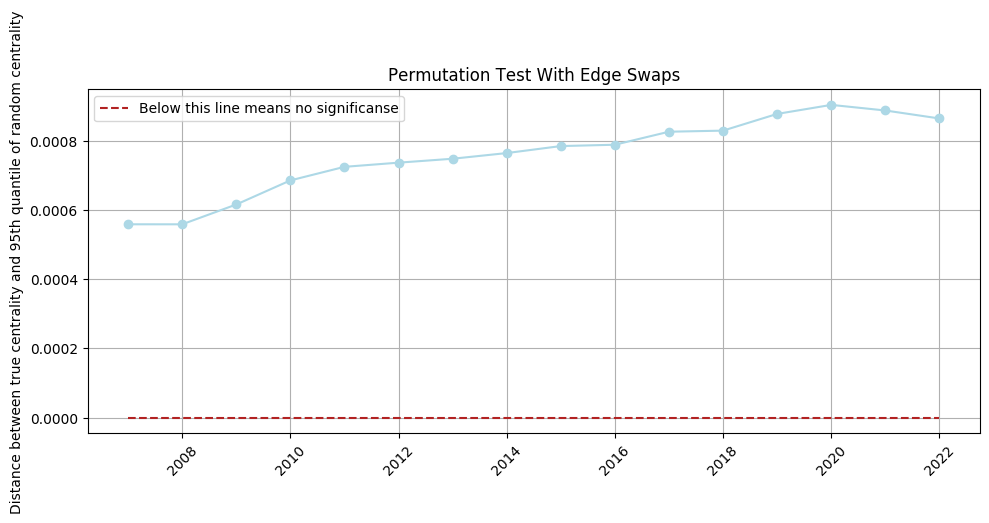

In [21]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(np.arange(2007,2023,1), dist_to_quantiles, '-o', c='lightblue')
ax.set_title("Permutation Test With Edge Swaps")
ax.set_ylabel("Distance between true centrality and 95th quantile of random centrality")
ax.plot(np.arange(2007,2023,1), np.zeros(16), '--',c='firebrick', label = 'Below this line means no significanse')
ax.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
marvel_centralities = []
dc_centralities = []
for key, value in tqdm(graphs_07.items()):
    centrality = nx.degree_centrality(value)
    true_centrality = np.percentile(list(centrality.values()),95)
    G_random = value.copy()
    for _ in range(50):
        labels = list(nx.get_node_attributes(value, "Universe").values())
        random_labels = random.sample(labels, len(labels))
        values = dict(zip(value.nodes,random_labels))

        nx.set_node_attributes(G_random, values, name="random group")

        universe = nx.get_node_attributes(G_random, "random group")
        uni_centrality = {}
        for u,v in centrality.items():
            try:
                uni_centrality[universe[u]] += [v]
            except KeyError:
                uni_centrality[universe[u]] = [v]

    marvel_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Marvel']))))
    dc_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['DC']))))

100%|██████████| 16/16 [00:02<00:00,  5.66it/s]


In [23]:
Male_centralities = []
Female_centralities = []
for key, value in tqdm(graphs_07.items()):
    centrality = nx.degree_centrality(value)
    true_centrality = np.percentile(list(centrality.values()),95)
    G_random = value.copy()
    for _ in range(50):
        labels = list(nx.get_node_attributes(value, "Sex").values())
        random_labels = random.sample(labels, len(labels))
        values = dict(zip(value.nodes,random_labels))

        nx.set_node_attributes(G_random, values, name="random group")

        universe = nx.get_node_attributes(G_random, "random group")
        uni_centrality = {}
        for u,v in centrality.items():
            try:
                uni_centrality[universe[u]] += [v]
            except KeyError:
                uni_centrality[universe[u]] = [v]

    Male_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Male']))))
    Female_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Female']))))

100%|██████████| 16/16 [00:02<00:00,  5.83it/s]


In [24]:
Black_centralities = []
Asian_centralities = []
Latino_centralities = []
for key, value in tqdm(graphs_07.items()):
    centrality = nx.degree_centrality(value)
    true_centrality = np.percentile(list(centrality.values()),95)
    G_random = value.copy()
    for _ in range(50):
        labels = list(nx.get_node_attributes(value, "Race").values())
        random_labels = random.sample(labels, len(labels))
        values = dict(zip(value.nodes,random_labels))

        nx.set_node_attributes(G_random, values, name="random group")

        universe = nx.get_node_attributes(G_random, "random group")
        uni_centrality = {}
        for u,v in centrality.items():
            try:
                uni_centrality[universe[u]] += [v]
            except KeyError:
                uni_centrality[universe[u]] = [v]

    Black_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Black']))))
    Asian_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Asian']))))
    Latino_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Latino']))))

100%|██████████| 16/16 [00:02<00:00,  5.54it/s]


In [25]:
Good_centralities = []
Bad_centralities = []
for key, value in tqdm(graphs_07.items()):
    centrality = nx.degree_centrality(value)
    true_centrality = np.percentile(list(centrality.values()),95)
    G_random = value.copy()
    for _ in range(50):
        labels = list(nx.get_node_attributes(value, "Alignment").values())
        random_labels = random.sample(labels, len(labels))
        values = dict(zip(value.nodes,random_labels))

        nx.set_node_attributes(G_random, values, name="random group")

        universe = nx.get_node_attributes(G_random, "random group")
        uni_centrality = {}
        for u,v in centrality.items():
            try:
                uni_centrality[universe[u]] += [v]
            except KeyError:
                uni_centrality[universe[u]] = [v]

    Good_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Good']))))
    Bad_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Bad']))))

100%|██████████| 16/16 [00:03<00:00,  5.17it/s]


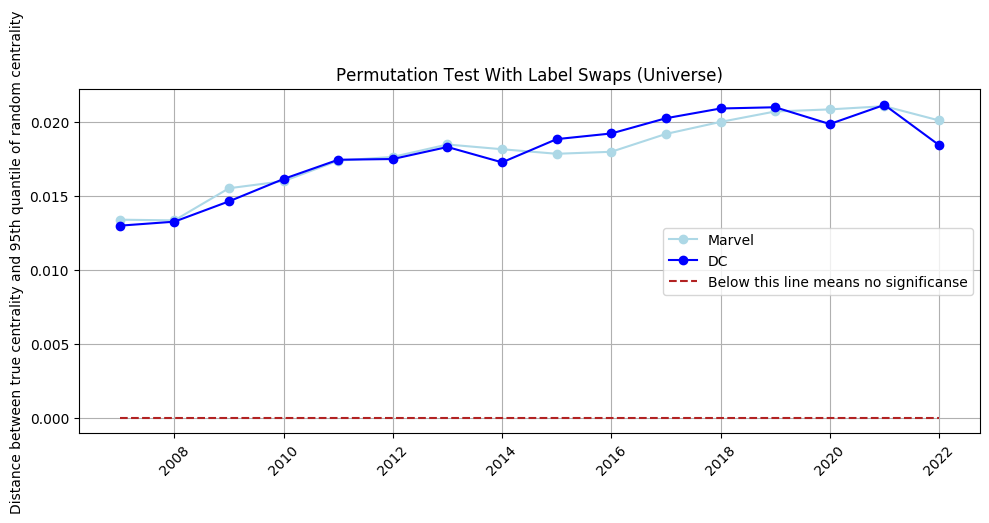

In [26]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(np.arange(2007,2023,1), marvel_centralities, '-o', c='lightblue',label='Marvel')
ax.plot(np.arange(2007,2023,1), dc_centralities, '-o', c='blue',label='DC')
ax.set_title("Permutation Test With Label Swaps (Universe)")
ax.set_ylabel("Distance between true centrality and 95th quantile of random centrality")
ax.plot(np.arange(2007,2023,1), np.zeros(16), '--',c='firebrick', label = 'Below this line means no significanse')
ax.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

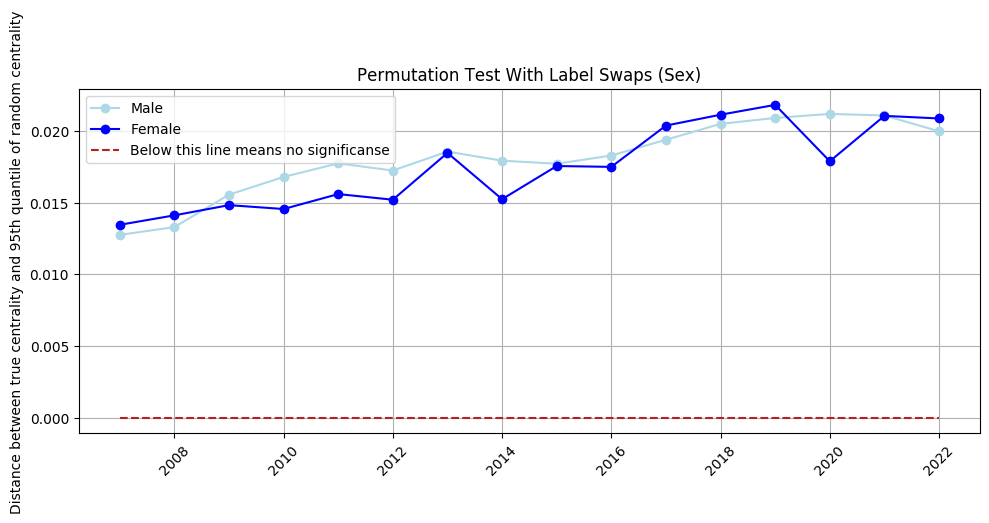

In [27]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(np.arange(2007,2023,1), Male_centralities, '-o', c='lightblue',label='Male')
ax.plot(np.arange(2007,2023,1), Female_centralities, '-o', c='blue',label='Female')
ax.set_title("Permutation Test With Label Swaps (Sex)")
ax.set_ylabel("Distance between true centrality and 95th quantile of random centrality")
ax.plot(np.arange(2007,2023,1), np.zeros(16), '--',c='firebrick', label = 'Below this line means no significanse')
ax.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

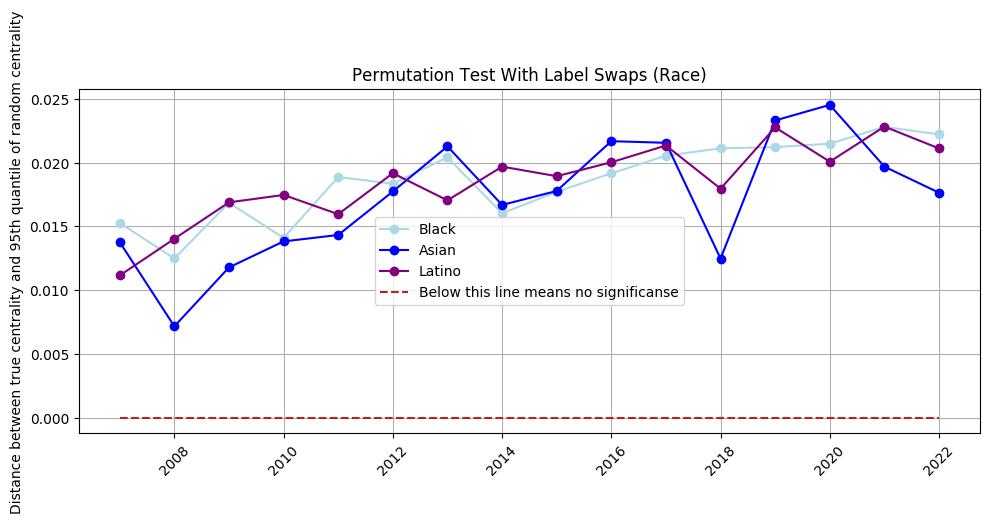

In [28]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(np.arange(2007,2023,1), Black_centralities, '-o', c='lightblue',label='Black')
ax.plot(np.arange(2007,2023,1), Asian_centralities, '-o', c='blue',label='Asian')
ax.plot(np.arange(2007,2023,1), Latino_centralities, '-o', c='purple',label='Latino')
ax.set_title("Permutation Test With Label Swaps (Race)")
ax.set_ylabel("Distance between true centrality and 95th quantile of random centrality")
ax.plot(np.arange(2007,2023,1), np.zeros(16), '--',c='firebrick', label = 'Below this line means no significanse')
ax.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

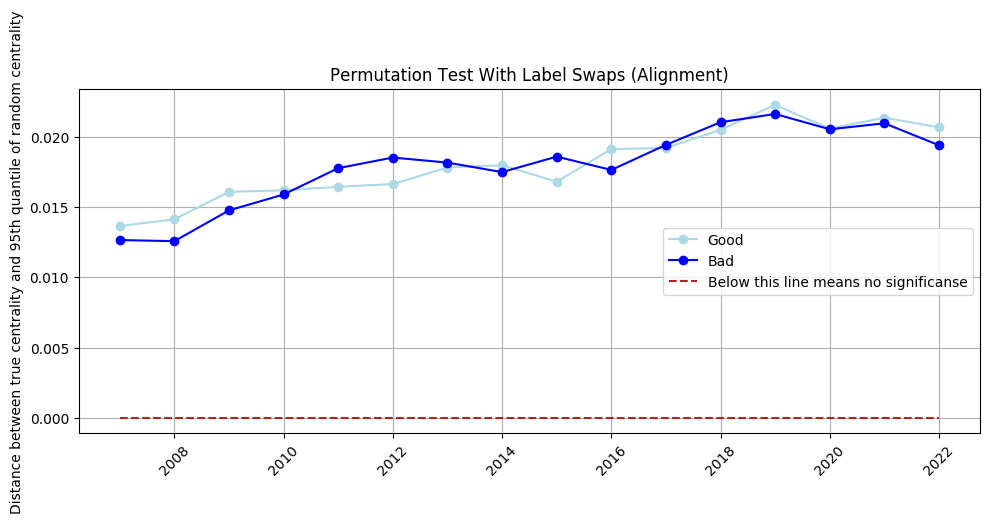

In [29]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(np.arange(2007,2023,1), Good_centralities, '-o', c='lightblue',label='Good')
ax.plot(np.arange(2007,2023,1), Bad_centralities, '-o', c='blue',label='Bad')
ax.set_title("Permutation Test With Label Swaps (Alignment)")
ax.set_ylabel("Distance between true centrality and 95th quantile of random centrality")
ax.plot(np.arange(2007,2023,1), np.zeros(16), '--',c='firebrick', label = 'Below this line means no significanse')
ax.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Clusters! How Do They Evolve?
In this section, we will use InfoMap to cluster the graph at $t_n$ and then see how nodes are added during each time step.

In [167]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

G = graphs[2022].copy().to_undirected()

# split into marvel and DC
marvel = []
dc = []
for key, value in nx.get_node_attributes(G,'Universe').items():
    if value == 'Marvel':
        marvel.append(key)
    elif value == 'DC':
        dc.append(key)

G_marvel = G.subgraph(marvel)
G_dc = G.subgraph(dc)

#Keep only largest component
G_marvel = G_marvel.subgraph(sorted(nx.connected_components(G_marvel), key=len, reverse=True)[0])
G_dc = G_dc.subgraph(sorted(nx.connected_components(G_dc), key=len, reverse=True)[0])

# compute the best partition
partition_marvel = community_louvain.best_partition(G_marvel)
partition_dc = community_louvain.best_partition(G_dc)


dc_pss = {}
marvel_pss = {}
for key in graphs.keys():
    dc_ps = []
    marvel_ps = []
    for node in graphs[key].nodes():
        try:
            graphs[key-1].nodes()[node]
            continue
        except:
            pass
        try:
            p_number_marvel = partition_marvel[node]
            marvel_ps.append(p_number_marvel)
        except:
            try:
                p_number_dc = partition_dc[node]
                dc_ps.append(p_number_dc)
            except:
                continue
    dc_pss[key] = dc_ps
    marvel_pss[key] = marvel_ps

from collections import Counter

dc_counts = {}
for key, value in dc_pss.items():
    dc_counts[key] = Counter(value)
marvel_counts = {}
for key, value in marvel_pss.items():
    marvel_counts[key] = Counter(value)

In [201]:
partition_matrix = np.zeros((18,22))
count = 0
for key, value in dc_counts.items():
    for key2, value2 in value.items():
        partition_matrix[key2+11,count] = value2
    count += 1
count = 0
for key, value in marvel_counts.items():
    for key2, value2 in value.items():
        partition_matrix[key2,count] = value2
    count += 1

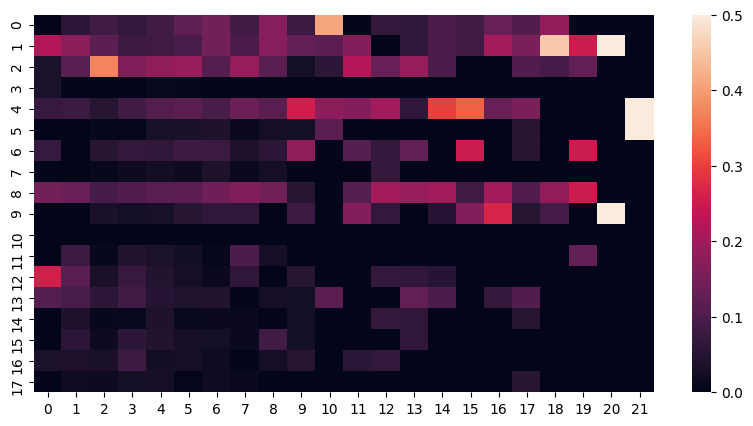

In [203]:
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import normalize

#normalize rows of matrix
partition_matrix = normalize(partition_matrix, axis=0, norm='l1')

fig, ax = plt.subplots(figsize=(10,5), dpi=100)
sns.heatmap(partition_matrix)
plt.show()

The fewer coloured points (and the lighter they are) would indicate a coral growth during that period of time. So let's investigate the graphs at 2021 and 2022.

In [285]:
from fa2 import ForceAtlas2
Gs = {}
positions = {}
for key in [2021,2022]:
    Gs[key] = graphs[key].copy().to_undirected()
    Gs[key] = Gs[key].subgraph(sorted(nx.connected_components(Gs[key]), key=len, reverse=True)[0])
    forceatlas2 = ForceAtlas2()
    positions[key] = forceatlas2.forceatlas2_networkx_layout(Gs[key], pos=None, iterations=100)

  1%|          | 1/100 [00:00<00:10,  9.38it/s]

BarnesHut Approximation  took  0.89  seconds
Repulsion forces  took  1.65  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.05  seconds


100%|██████████| 100/100 [00:02<00:00, 41.47it/s]

BarnesHut Approximation  took  0.67  seconds
Repulsion forces  took  1.62  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.05  seconds


In [ ]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

<Figure size 432x288 with 0 Axes>

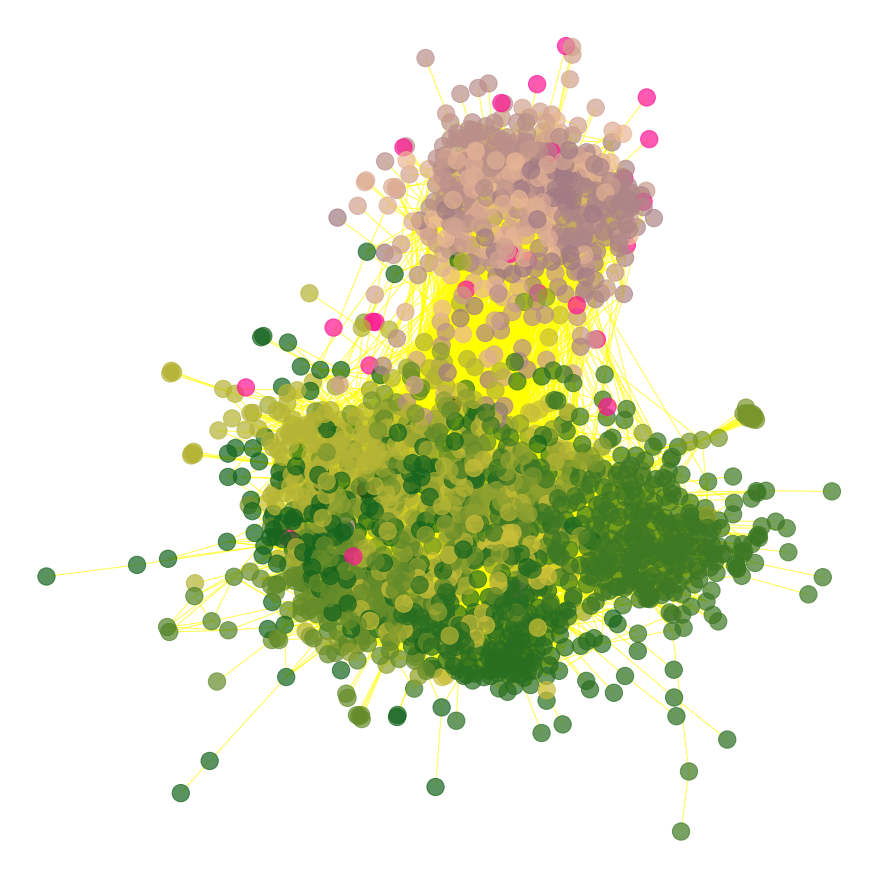

In [320]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

partition_2021 = {}
for key,value in partition_marvel.items():
    try:
        Gs[2021].nodes()[key]
        partition_2021[key] = rgb_to_hex((round(value*20+21),round(value*10+100),round(value*3+30)))
        #partition_2021[key] = value
    except:
        partition_2021[key] = '#000000'
for key,value in partition_dc.items():
    try:
        Gs[2021].nodes()[key]
        partition_2021[key] = rgb_to_hex((round((value+11)*12+30),round((value+11)*10+13),round((value+11)*3+100)))
        #partition_2021[key] = value+11
    except:
        partition_2021[key] = '#000000'
for node in Gs[2022].nodes():
    try:
        partition_2021[node]
    except:
        partition_2021[node] ='#FF1493'

#cmap = cm.get_cmap('winter', max(partition_2021.values()) + 1)
 
plt.clf()
plt.figure(3,figsize=(12,12))
nx.draw(Gs[2022], 
        pos = positions[2022],
         nodelist = sorted(Gs[2022].nodes()), #cmap= cmap,
                node_color = list(dict(sorted(partition_2021.items())).values()),
                edge_color = '#FFFF00',
                alpha = 0.7)
plt.show()

In [272]:
sorted(partition_2021.items())
sorted(Gs[2021].nodes())

['3-D Man',
 '711 (Quality Comics)',
 'Abby Holland',
 'Abigail Brand',
 'Abin Sur',
 'Abner Jenkins',
 'Abomination (character)',
 'Abra Kadabra (character)',
 'Abraham Cornelius',
 'Abraham Whistler',
 'Absorbing Man',
 'Ace the Bat-Hound',
 'Achebe (comics)',
 'Adam Strange',
 'Adam Warlock',
 'Adrienne Frost',
 'Agatha Harkness',
 'Agent (comics)',
 'Agent Liberty',
 'Agent X (Marvel Comics)',
 'Air Wave',
 'Air-Walker',
 'Al MacKenzie',
 'Aldrich Killian',
 'Aleksander Lukin',
 'Aleta Ogord',
 'Alex Power',
 'Alex Wilder',
 'Alexander Bont',
 'Alicia Masters',
 'Alistair Smythe',
 'Alura (DC Comics)',
 'Alyssa Moy',
 'Amadeus Cho',
 'Amanda Sefton',
 'Amazing-Man (DC Comics)',
 'Amazo',
 'Ambush Bug',
 'Amelia Voght',
 'American Dream (comics)',
 'American Eagle (Marvel Comics)',
 'Amethyst, Princess of Gemworld',
 'Anarky',
 'Ancient One',
 'Andrew Chord',
 'Angel (Thomas Halloway)',
 'Angel Dust (comics)',
 'Angel Salvadore',
 'Angel and the Ape',
 'Ani-Mator',
 'Ani-Men#Origina

Now we do have some indication that there is indead a coral growth in the wiki articles. However, to further investigate this, we will during the project try to come up with a combined solution with the infomap algorithm and community bursts. It is quite interesting to see if our hypothesis is true.

### How Did the Network Evolve?
In this section, we will investigate how the network evolves from $t_0$ to $t_n$. Let us first create a video of each year of the network.

In [387]:
#keep only largest component
for key in graphs.keys():
    temp = graphs[key].copy().to_undirected()
    temp2 = temp.subgraph(sorted(nx.connected_components(temp), key=len, reverse=True)[0])
    graphs[key] = temp2

In [388]:
nx.number_connected_components(graphs[2002])

1

In [389]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [406]:
from fa2 import ForceAtlas2
positions = {}
for key in graphs.keys():
    
    forceatlas2 = ForceAtlas2(
                            # Behavior alternatives
                            outboundAttractionDistribution=True,  # Dissuade hubs
                            linLogMode=False,  # NOT IMPLEMENTED
                            adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                            edgeWeightInfluence=1.0,

                            # Performance
                            jitterTolerance=1.0,  # Tolerance
                            barnesHutOptimize=True,
                            barnesHutTheta=1.2,
                            multiThreaded=False,  # NOT IMPLEMENTED

                            # Tuning
                            scalingRatio=2.0,
                            strongGravityMode=True,
                            gravity=2.0,

                            # Log
                            verbose=True)


    positions[key] = forceatlas2.forceatlas2_networkx_layout(graphs[key], pos=None, iterations=2000)

 65%|██████▍   | 1299/2000 [00:00<00:00, 6673.63it/s]

BarnesHut Approximation  took  0.02  seconds
Repulsion forces  took  0.03  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


 20%|█▉        | 390/2000 [00:00<00:00, 1949.21it/s]

BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.14  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


  2%|▏         | 41/2000 [00:00<00:04, 406.30it/s]

BarnesHut Approximation  took  0.26  seconds
Repulsion forces  took  0.56  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.09  seconds


  1%|          | 13/2000 [00:00<00:16, 118.95it/s]

BarnesHut Approximation  took  1.89  seconds
Repulsion forces  took  3.21  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.25  seconds


  1%|          | 17/2000 [00:00<00:31, 63.72it/s]

BarnesHut Approximation  took  8.29  seconds
Repulsion forces  took  11.48  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.52  seconds


  1%|          | 16/2000 [00:00<00:33, 59.85it/s]

BarnesHut Approximation  took  12.29  seconds
Repulsion forces  took  31.45  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.11  seconds
AdjustSpeedAndApplyForces step  took  0.78  seconds


  0%|          | 6/2000 [00:01<08:40,  3.83it/s]

BarnesHut Approximation  took  16.35  seconds
Repulsion forces  took  30.96  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.14  seconds
AdjustSpeedAndApplyForces step  took  0.85  seconds


  0%|          | 7/2000 [00:00<00:29, 67.53it/s]

BarnesHut Approximation  took  10.87  seconds
Repulsion forces  took  31.53  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.15  seconds
AdjustSpeedAndApplyForces step  took  0.88  seconds


  0%|          | 7/2000 [00:00<00:30, 66.42it/s]

BarnesHut Approximation  took  18.75  seconds
Repulsion forces  took  31.64  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.17  seconds
AdjustSpeedAndApplyForces step  took  0.90  seconds


  1%|          | 14/2000 [00:00<00:35, 55.26it/s]

BarnesHut Approximation  took  7.99  seconds
Repulsion forces  took  29.00  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.17  seconds
AdjustSpeedAndApplyForces step  took  0.90  seconds


  0%|          | 6/2000 [00:00<00:33, 58.83it/s]

BarnesHut Approximation  took  8.73  seconds
Repulsion forces  took  30.46  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.18  seconds
AdjustSpeedAndApplyForces step  took  0.89  seconds


  0%|          | 8/2000 [00:00<00:28, 70.00it/s]

BarnesHut Approximation  took  7.55  seconds
Repulsion forces  took  31.43  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.17  seconds
AdjustSpeedAndApplyForces step  took  0.90  seconds


  0%|          | 8/2000 [00:00<00:28, 69.73it/s]

BarnesHut Approximation  took  12.53  seconds
Repulsion forces  took  33.98  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.19  seconds
AdjustSpeedAndApplyForces step  took  0.91  seconds


  0%|          | 7/2000 [00:00<00:29, 68.23it/s]

BarnesHut Approximation  took  10.77  seconds
Repulsion forces  took  34.03  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.20  seconds
AdjustSpeedAndApplyForces step  took  0.91  seconds


  1%|          | 14/2000 [00:00<00:34, 57.71it/s]

BarnesHut Approximation  took  11.84  seconds
Repulsion forces  took  30.31  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.19  seconds
AdjustSpeedAndApplyForces step  took  0.92  seconds


  0%|          | 7/2000 [00:00<00:29, 66.72it/s]

BarnesHut Approximation  took  12.43  seconds
Repulsion forces  took  31.64  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.19  seconds
AdjustSpeedAndApplyForces step  took  0.92  seconds


  0%|          | 7/2000 [00:00<00:29, 67.53it/s]

BarnesHut Approximation  took  15.35  seconds
Repulsion forces  took  32.95  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.22  seconds
AdjustSpeedAndApplyForces step  took  0.93  seconds


  0%|          | 0/2000 [00:00<?, ?it/s]

BarnesHut Approximation  took  14.85  seconds
Repulsion forces  took  34.00  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.21  seconds
AdjustSpeedAndApplyForces step  took  0.93  seconds


  0%|          | 7/2000 [00:00<00:33, 60.11it/s]

BarnesHut Approximation  took  15.32  seconds
Repulsion forces  took  37.94  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.23  seconds
AdjustSpeedAndApplyForces step  took  0.94  seconds


  0%|          | 0/2000 [00:00<?, ?it/s]

BarnesHut Approximation  took  12.40  seconds
Repulsion forces  took  36.65  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.23  seconds
AdjustSpeedAndApplyForces step  took  0.94  seconds


  0%|          | 7/2000 [00:00<00:32, 61.04it/s]

BarnesHut Approximation  took  14.28  seconds
Repulsion forces  took  36.24  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.22  seconds
AdjustSpeedAndApplyForces step  took  0.94  seconds


100%|██████████| 2000/2000 [00:53<00:00, 37.51it/s]

BarnesHut Approximation  took  12.68  seconds
Repulsion forces  took  38.47  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.23  seconds
AdjustSpeedAndApplyForces step  took  0.95  seconds


In [391]:
cmap = {}
degrees = {}
newvalue = ''
for key in graphs.keys():
    cmap[key] = nx.get_node_attributes(graphs[key], 'Universe')
    for k, value in cmap[key].items():
        if value == 'DC':
            newvalue = '#012AB7'
        elif value == 'Marvel':
            newvalue = '#F0131E'
        else:
            newvalue = '#000000'
        cmap[key][k] = newvalue

    #Get degree map
    degrees[key] = dict(graphs[key].degree)

<ipython-input-423-039f0effec98>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,8))


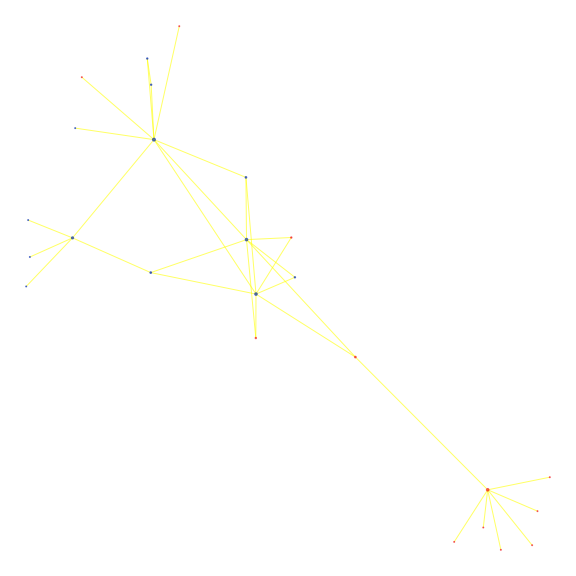

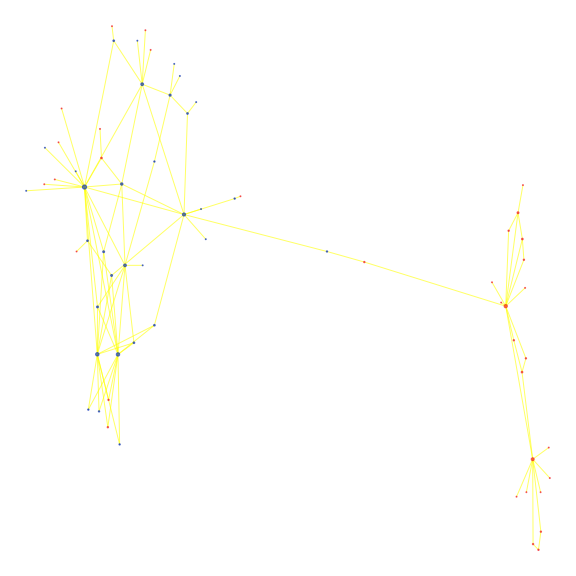

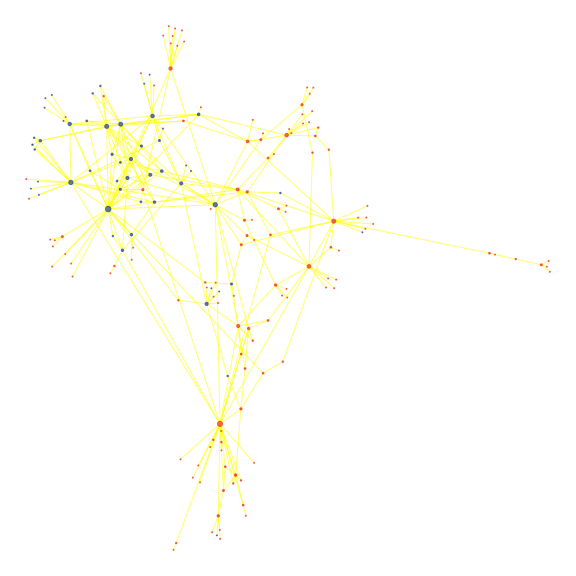

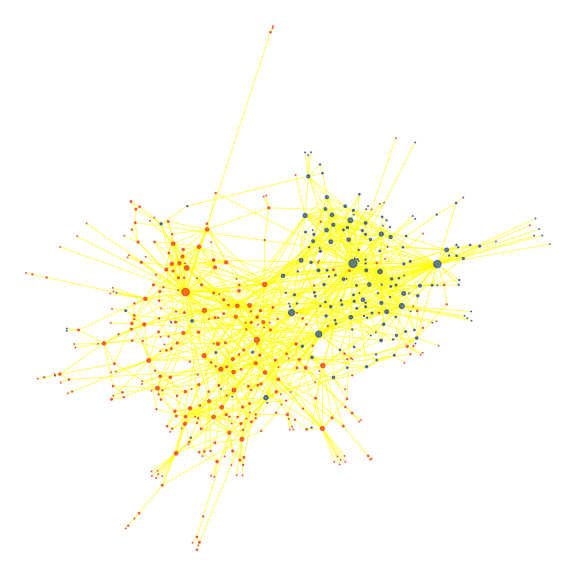

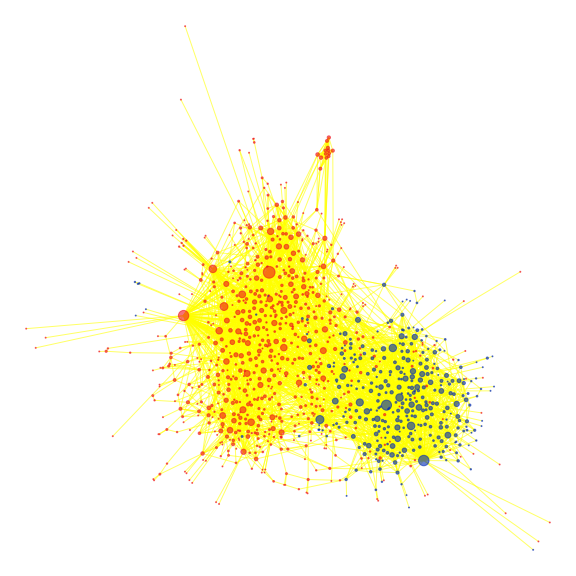

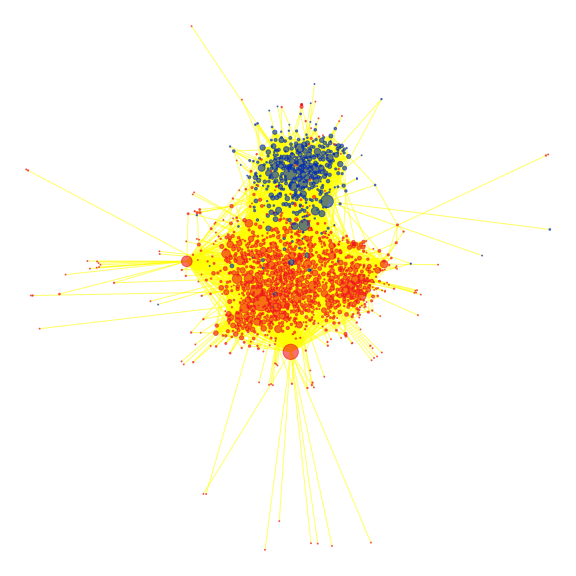

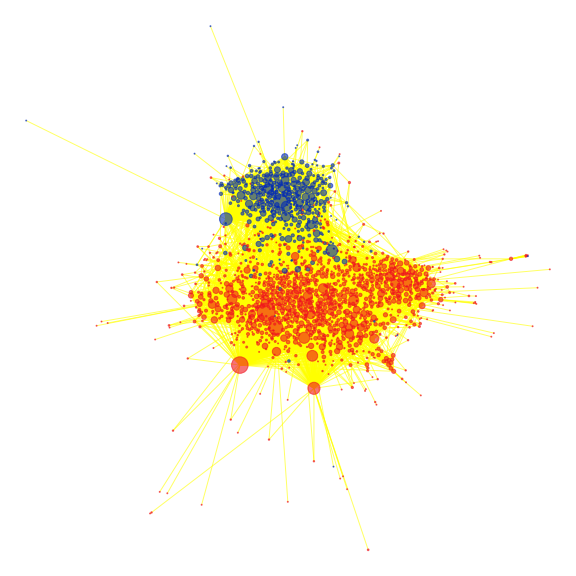

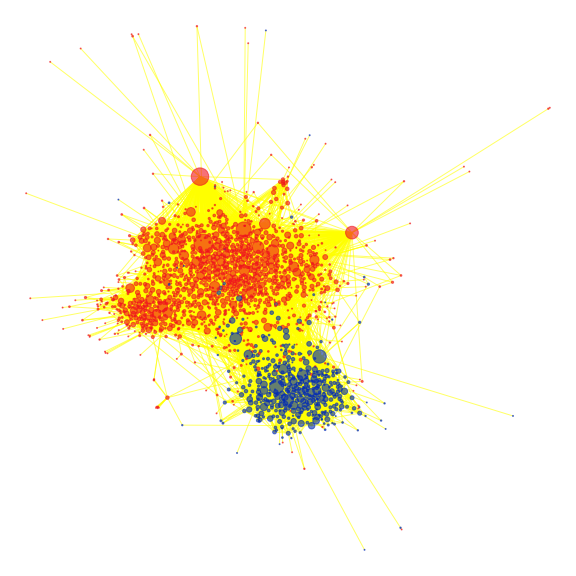

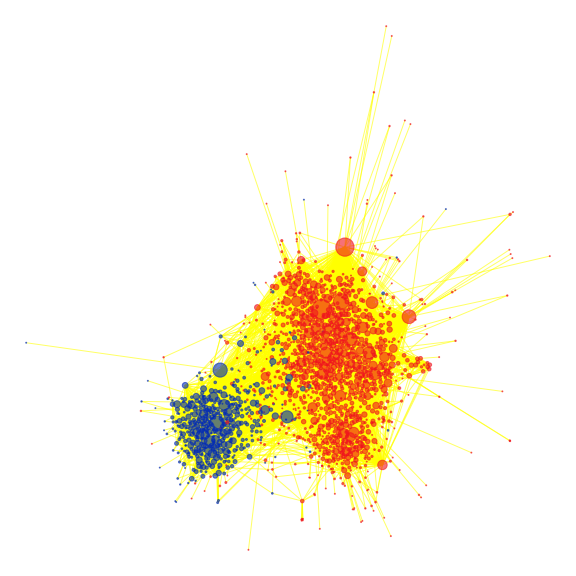

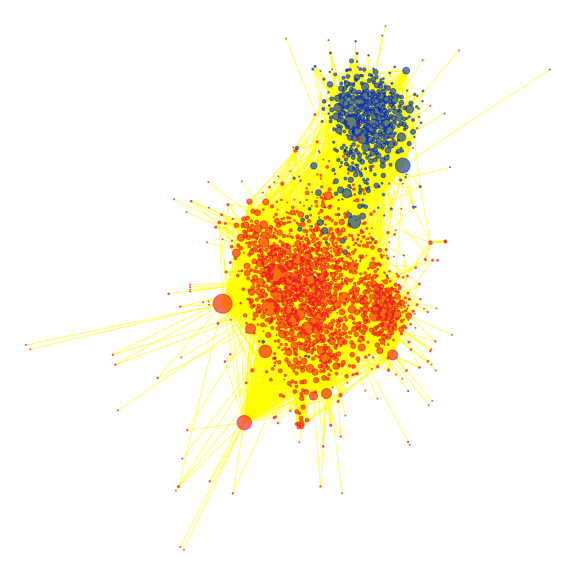

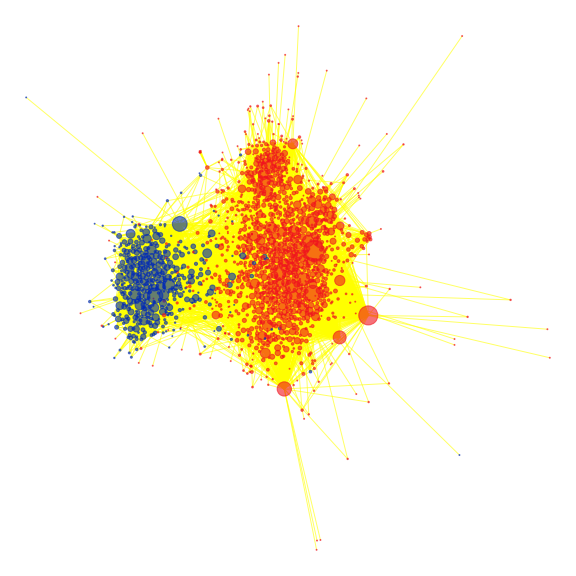

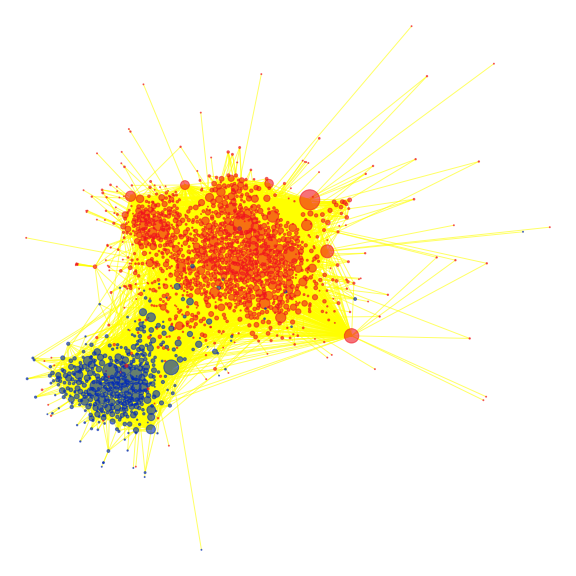

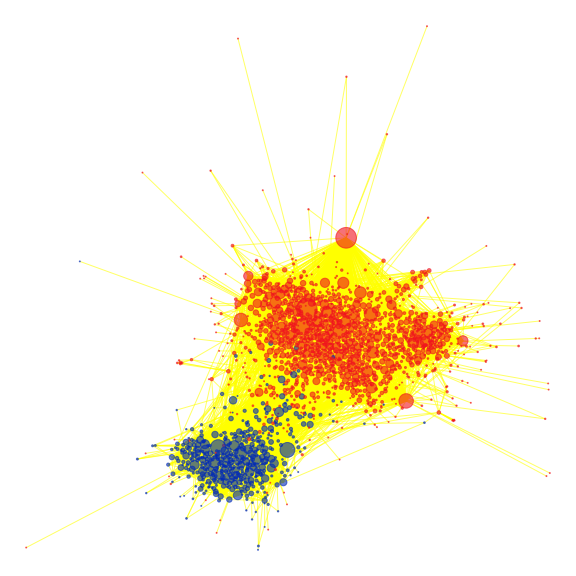

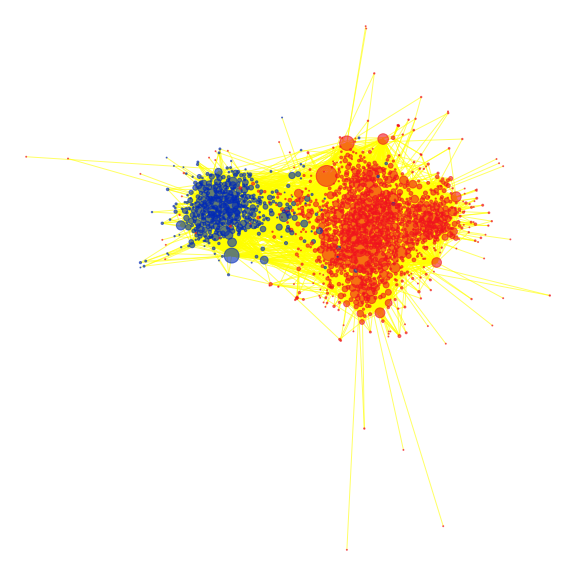

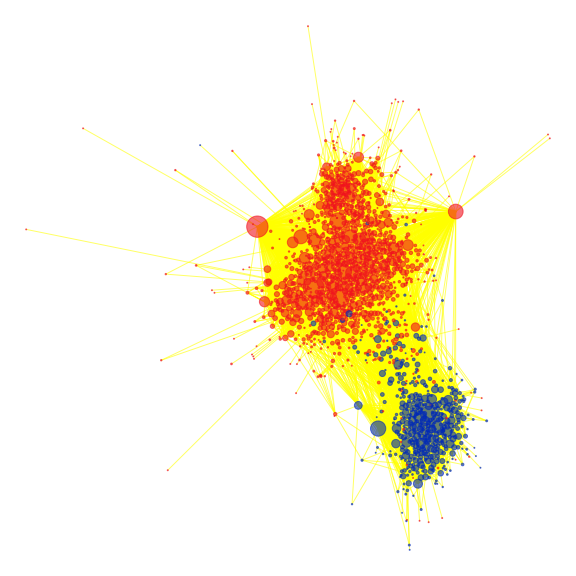

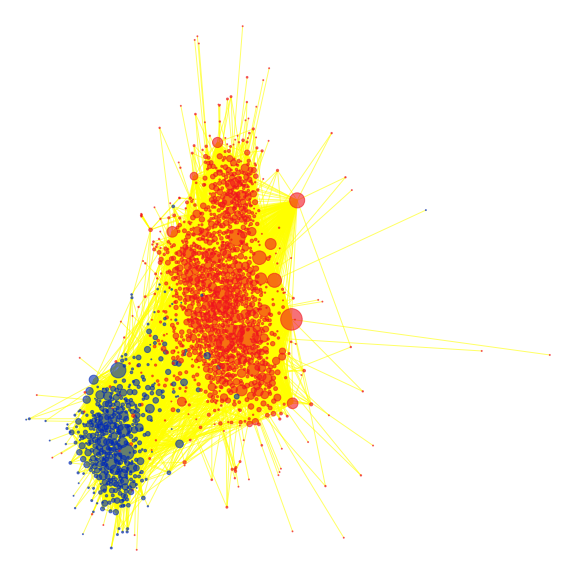

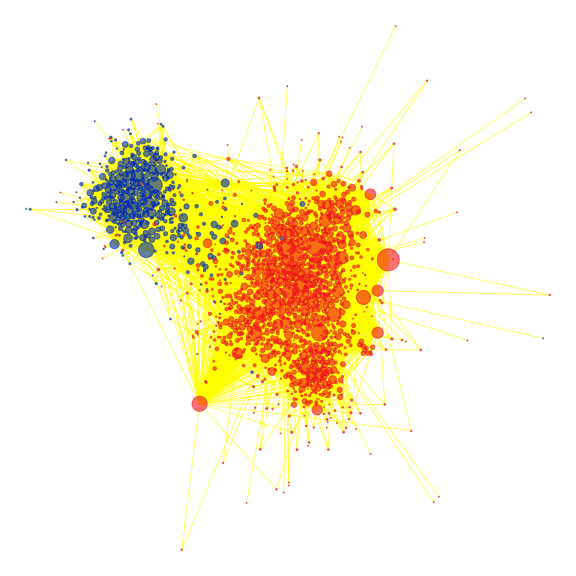

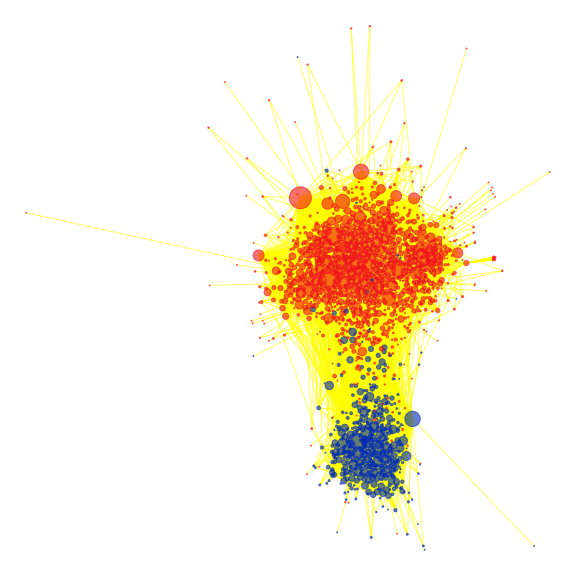

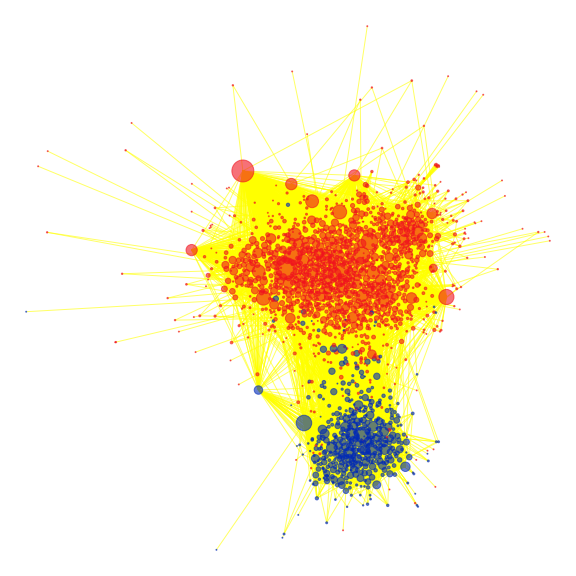

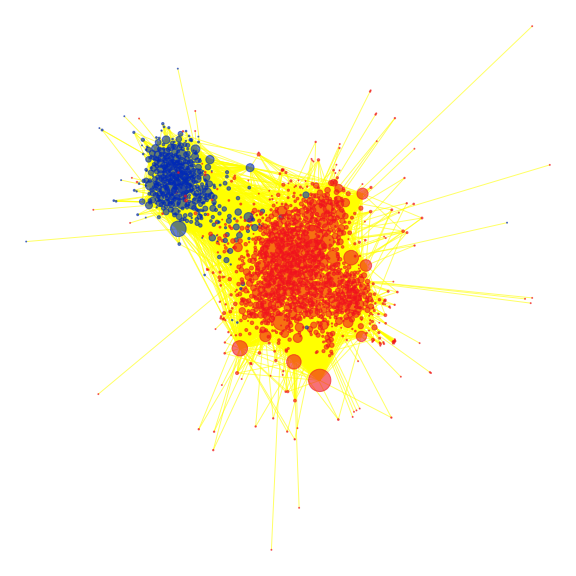

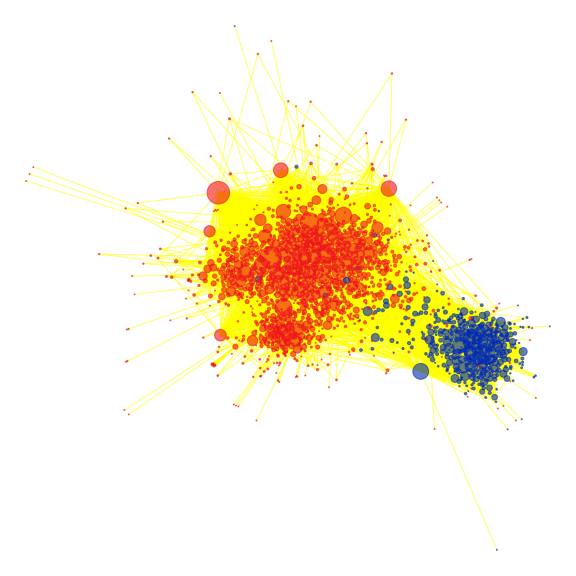

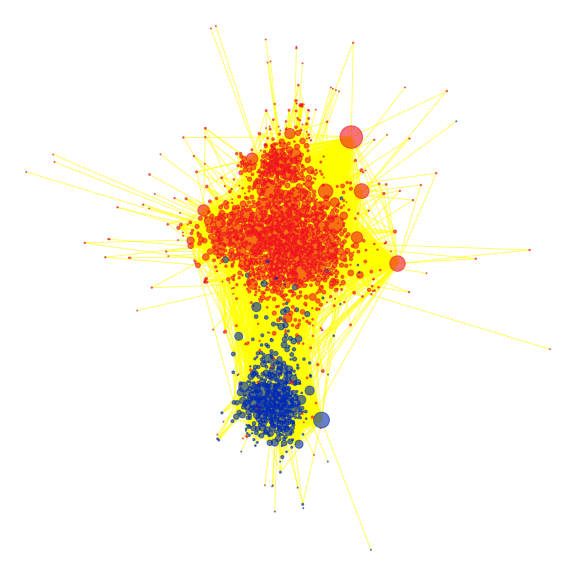

In [423]:
# plot the graphs:
for year in graphs.keys():
    plt.figure(figsize=(8,8))
    nx.draw(graphs[year], pos = positions[year],
                     nodelist = cmap[year].keys(), 
                     node_size= [d for d in degrees[year].values()], 
                     node_color = cmap[year].values(),
                    edge_color = '#FFFF00',
                    alpha = 0.6)
    plt.title(f'{year}', style='italic')
    plt.savefig(f'plots/G_plot_{year}.png', bbox_inches='tight')

In [424]:
import imageio
import os
import re

with imageio.get_writer('G_plot_final.gif', mode='I', fps=1) as writer:
    for year in graphs.keys():
        image = imageio.imread(f'plots/G_plot_{year}.png')
        writer.append_data(image)
    writer.close()

In [ ]:
nx.get_node_attributes(graphs[2001],'Race')
#cmap[2001]

In [ ]:
%matplotlib inline

@widgets.interact(year=(2001, 2007, 1))
def update(year=2001):
    """Remove old plot and plot new one"""
    plt.clf()
    plt.figure(3,figsize=(12,12))
    nx.draw(graphs[year], pos = positions[year],
                     nodelist = cmap[year].keys(), 
                     node_size=[d for d in degrees[year].values()], 
                     node_color = cmap[year].values(),
                    edge_color = '#FFFF00',
                    alpha = 0.6)
    plt.show()

In [ ]:
graphs[2001]